Read the file "Scroe.csv".

Fill the Null or NA values with average of respective student.


In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('Score.csv')


for index, row in df.iterrows():
    mean_score = row[3:].replace(0, np.nan).mean()
    df.iloc[index, 3:] = row[3:].replace(0, np.nan).fillna(mean_score)

Calculate Avgerage of Each student and store in the column named as "Avg"

In [31]:
df['Avg'] = df.iloc[:, 3:].mean(axis=1)

On the basis of Average, calculate the progress of student.



```
if average > 5 then set progress to Good,
else if average == 5 then progress is average
else set progress to below average.
```



In [32]:
def assign_progress(avg):
    if avg > 5:
        return 'Good'
    elif avg == 5:
        return 'Average'
    else:
        return 'Below Average'

df['Progress'] = df['Avg'].apply(assign_progress)

Transform Categorical values into Numerical values.

In [33]:
df['Progress'] = df['Progress'].map({'Good': 2, 'Average': 1, 'Below Average': 0})
df = pd.get_dummies(df, columns=['Subject', 'Section'], drop_first=True)

print(df.head())

   S.No   L01   L02   L03   L04    L05   L06       Avg  Progress  \
0     1   6.0   6.0  10.0   5.0  10.00  6.50  7.250000         2   
1     2  10.0  10.0  10.0   9.0  10.00  7.00  9.333333         2   
2     3   7.0   7.0  10.0   9.0  10.00  8.60  8.600000         2   
3     4   9.0   7.0  10.0   7.0  10.00  6.00  8.166667         2   
4     5   3.0  10.0  10.0  10.0   8.25  8.25  8.250000         2   

   Subject_Introduction to Computing Lab  Subject_Object Oriented Programming  \
0                                   True                                False   
1                                   True                                False   
2                                   True                                False   
3                                   True                                False   
4                                   True                                False   

   Section_AM  Section_BM  Section_CM  Section_DM  Section_EM  
0       False       False       False   

Set the s to all the columns except s.no and progress.

Set the label variable to progress.

Split the dataset into test and train.
  1. 1st time train set is set to 70 and test 30
  2. For second time split into 0.20
  3. For third time split into 1:3


In [34]:
from sklearn.model_selection import train_test_split

# Feature set and labels
X = df.drop(['S.No', 'Progress'], axis=1)
y = df['Progress']

# Split the data into training and testing sets
splits = [
    train_test_split(X, y, test_size=0.30, random_state=42),
    train_test_split(X, y, test_size=0.20, random_state=42),
    train_test_split(X, y, test_size=0.25, random_state=42)  # 1:3 ratio, i.e., 25% test size
]


Apply all the Machine algorithm we had covered in our course to predict the progress of student.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Split 1 - Accuracy: 0.9607843137254902
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000   1.000000
1              0.000000  0.000000  0.000000   2.000000
2              0.960000  1.000000  0.979592  48.000000
accuracy       0.960784  0.960784  0.960784   0.960784
macro avg      0.653333  0.666667  0.659864  51.000000
weighted avg   0.923137  0.960784  0.941577  51.000000
Logistic Regression - Split 2 - Accuracy: 1.0
              precision  recall  f1-score  support
0                   1.0     1.0       1.0      1.0
1                   1.0     1.0       1.0      1.0
2                   1.0     1.0       1.0     32.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     34.0
weighted avg        1.0     1.0       1.0     34.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Split 3 - Accuracy: 0.9534883720930233
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000   1.000000
1              0.000000  0.000000  0.000000   2.000000
2              0.952381  1.000000  0.975610  40.000000
accuracy       0.953488  0.953488  0.953488   0.953488
macro avg      0.650794  0.666667  0.658537  43.000000
weighted avg   0.909192  0.953488  0.930800  43.000000


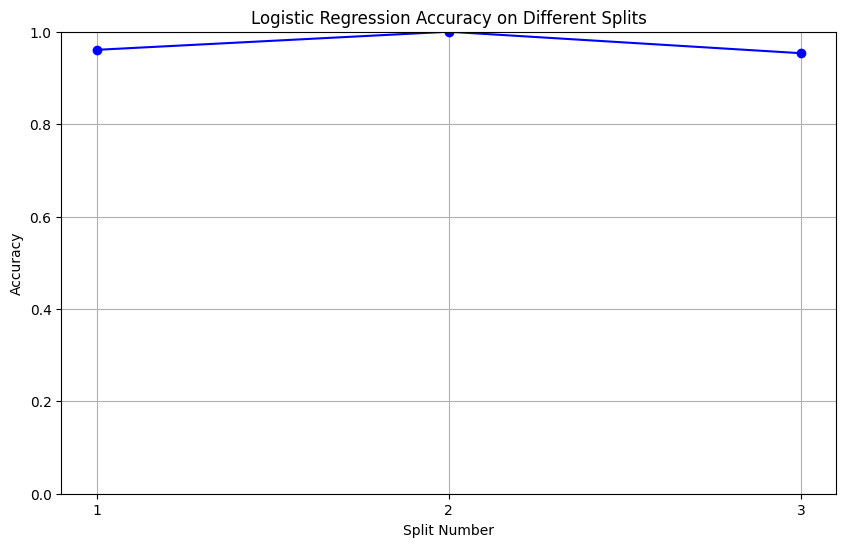

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

results = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append((accuracy, report))
    print(f"Logistic Regression - Split {i+1} - Accuracy: {accuracy}")
    print(pd.DataFrame(report).transpose())

accuracies = [result[0] for result in results]

plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3], accuracies, marker='o', linestyle='-', color='b')
plt.title('Logistic Regression Accuracy on Different Splits')
plt.xlabel('Split Number')
plt.ylabel('Accuracy')
plt.xticks([1, 2, 3])
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Self Learn:

Learn a new Machine Learning Algorithm Which is not covered in our course and implement it on our score dataset for the prediction of Progress of student.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Applying Gradient Boosting
gb_results = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    gb_results.append((accuracy, report))
    print(f"Gradient Boosting - Split {i+1} - Accuracy: {accuracy}")
    print(pd.DataFrame(report).transpose())


Gradient Boosting - Split 1 - Accuracy: 1.0
              precision  recall  f1-score  support
0                   1.0     1.0       1.0      1.0
1                   1.0     1.0       1.0      2.0
2                   1.0     1.0       1.0     48.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     51.0
weighted avg        1.0     1.0       1.0     51.0
Gradient Boosting - Split 2 - Accuracy: 1.0
              precision  recall  f1-score  support
0                   1.0     1.0       1.0      1.0
1                   1.0     1.0       1.0      1.0
2                   1.0     1.0       1.0     32.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     34.0
weighted avg        1.0     1.0       1.0     34.0
Gradient Boosting - Split 3 - Accuracy: 1.0
              precision  recall  f1-score  support
0                   1.0     1.0       1.0      1.0
1                   1.0     1.0       1.0      2.0
2

#Do's

For each model , use each spliting and get three different results.

Compare the all the model on each spliting.

Result : generate result on the basis of our your thinking.

Visualize your dataset on the each model using matplotlib.

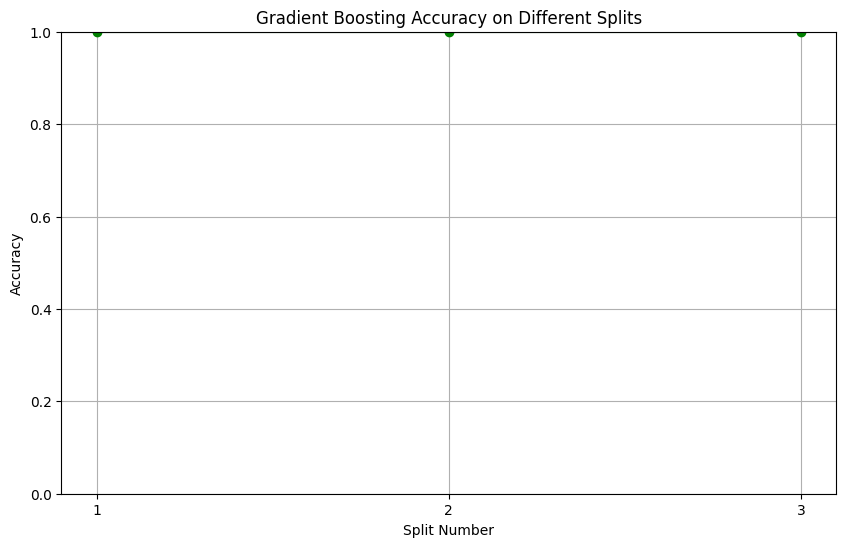

In [40]:
# Visualization of accuracies for Gradient Boosting
gb_accuracies = [result[0] for result in gb_results]

plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3], gb_accuracies, marker='o', linestyle='-', color='g')
plt.title('Gradient Boosting Accuracy on Different Splits')
plt.xlabel('Split Number')
plt.ylabel('Accuracy')
plt.xticks([1, 2, 3])
plt.ylim(0, 1)
plt.grid(True)
plt.show()